| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  | Gibbs Sampler for Normal Model|
| Author    | Joshuah Touyz, PhD |
| Version   | 0.2 |
|Last update| 11/10/20 |

In [1]:
import pandas as pd
import numpy as np
import plotnine as pn
from scipy.stats import invgamma

In [2]:
### Example Gibbs Sampler - Normal Model ###

# Constants
X = np.array([150,230,50,500,260,490])
x_bar = np.mean(X)
N = len(X)
tau2 = 100; mu_0 = 100
alpha = 10; beta = 10
alpha_prime = alpha + N/2

# Utility functions
rnorm = lambda mean_in, sd_in : np.random.normal(size = 1, loc = mean_in, scale = sd_in)
rinvgamma = lambda shape, scale: invgamma.rvs(size = 1, a = shape, scale = scale)

# Pre-allocation
k = 11000
mu_post = np.ones(k)
sigma2_post = np.ones(k)

# Init values
T = 1000 # Burin
mu_post[0] = x_bar
sigma2_post[0] = np.var(X)


In [3]:
# Gibbs sampler

for i in range(1,k):

    # mu|x,sigma2
    s2_post = (1/tau2 + N/sigma2_post[i-1])**(-1)
    p = (N/sigma2_post[i-1]) * s2_post
    mean_post = p* x_bar + (1-p)*mu_0
    mu_post[i] = rnorm(mean_in = mean_post, sd_in = s2_post**(1/2))

    # sigma2|x,mu
    beta_prime = beta + np.sum((mu_post[i]- x_bar)**2)/2
    sigma2_post[i] = rinvgamma(shape = alpha_prime, scale = beta_prime)

# Remove burn-in
mu_post = mu_post[-T:]
sigma2_post = sigma2_post[-T:]

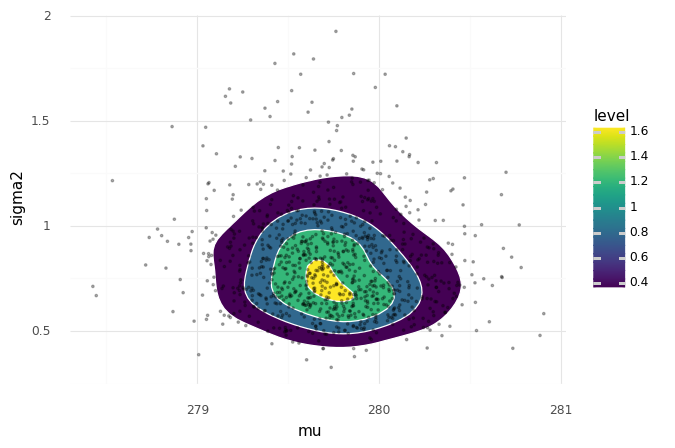

<ggplot: (287154082)>

In [4]:
# Plot
data_in = pd.DataFrame({'mu':mu_post, 'sigma2':sigma2_post})
pn.ggplot(pn.aes(x = 'mu', y = 'sigma2'), data = data_in)\
    + pn.stat_density_2d(pn.aes(fill = '..level..'), geom = 'polygon', color = 'white')\
    + pn.geom_point(size = 0.5, alpha= 0.3)\
    + pn.theme_minimal()

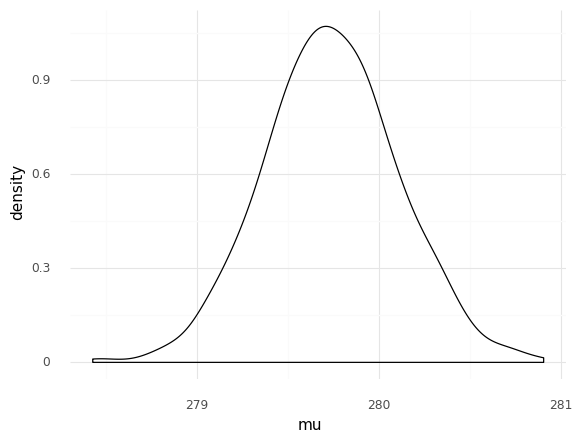

<ggplot: (-9223372036519995455)>

In [5]:
# Plot mu|x,sigma2
pn.ggplot(pn.aes(x = 'mu'), data = data_in) + pn.geom_density() + pn.theme_minimal()

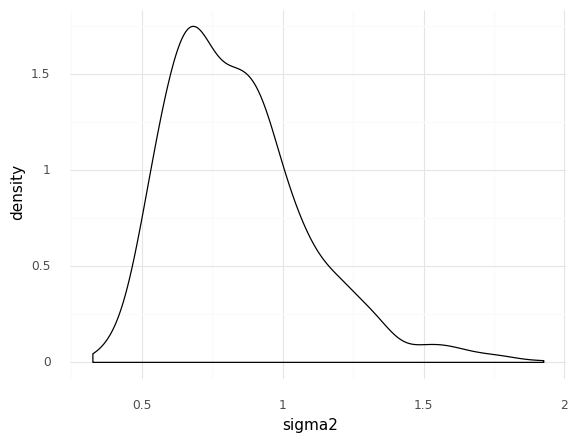

<ggplot: (-9223372036517748529)>

In [6]:
# Plot sigma2|x,mu
pn.ggplot(pn.aes(x = 'sigma2'), data = data_in) + pn.geom_density() + pn.theme_minimal()